#**Data Collection**

##**Source of the Data**
The dataset used for predicting stroke is sourced from Kaggle, a reputable platform for datasets and data science projects. It captures a comprehensive range of health parameters that influence stroke risk. This includes variables such as demographics, lifestyle choices, and medical history, making it a valuable resource for predictive modeling. The dataset's extensive coverage of relevant factors provides a solid foundation for developing accurate and reliable predictive models.

##**Suitability of the Dataset**
This dataset is particularly suitable for the problem of stroke prediction due to its detailed and varied set of features. These include:

* Demographic Information: Such as age, gender, and other relevant demographic details.
* Medical History: Including conditions like hypertension and heart disease.
* Lifestyle Factors: Like smoking status, alcohol intake, and physical activity.
* Physiological Measurements: Such as body mass index (BMI), average glucose levels, and other relevant health metrics.

The presence of these diverse features allows for the application of various machine learning algorithms to identify patterns and key predictors of stroke. This comprehensive data enables the development of a robust predictive model that can help in early detection and prevention strategies.

#**Data Cleaning**

**Load The Dataset**

In [1]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=4a1335ae51e28186020c8038794757a521c19729b116e10ad7e11dee579aaa17
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
# Replace 'dataset-name' with the actual dataset name
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset
# Unzip the downloaded dataset
!unzip stroke-prediction-dataset.zip -d /content
import pandas as pd
# Load the dataset
file_path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 61.0MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: /content/healthcare-dataset-stroke-data.csv  


In [3]:
stroke_data= data.copy()
# Display the first few rows of the dataset
print(stroke_data.head())
stroke_data.describe(include='all')

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


**Handling Missing Values**

In [4]:
# Check for missing values
print(stroke_data.isnull().sum())
# Removing null values
stroke_data.dropna(how='any', inplace=True)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


 There is 201 samples with null values in bmi column , we will remove them

**Remove Duplicates**

In [5]:
# Check for duplicates
duplicates = stroke_data[stroke_data.duplicated()]
num_duplicates = duplicates.shape[0]
print(f'There are {num_duplicates} duplicate rows in the dataset.')
#Remove duplicates
stroke_data.drop_duplicates(inplace=True)

There are 0 duplicate rows in the dataset.


**Correct any data types or inconsistencies**

In [6]:
# Correct data types or inconsistencies
stroke_data['age'] = stroke_data['age'].astype(float)
stroke_data['hypertension'] = stroke_data['hypertension'].astype(int)
stroke_data['heart_disease'] = stroke_data['heart_disease'].astype(int)
stroke_data['avg_glucose_level'] = stroke_data['avg_glucose_level'].astype(float)
stroke_data['bmi'] = stroke_data['bmi'].astype(float)
stroke_data['stroke'] = stroke_data['stroke'].astype(int)

**Summary of the data before and after cleaning**

In [7]:
# Summary before cleaning
print(data.describe(include='all'))
# Summary after cleaning
print(stroke_data.describe(include='all'))

                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110  

#**Exploratory Data Analysis (EDA)**

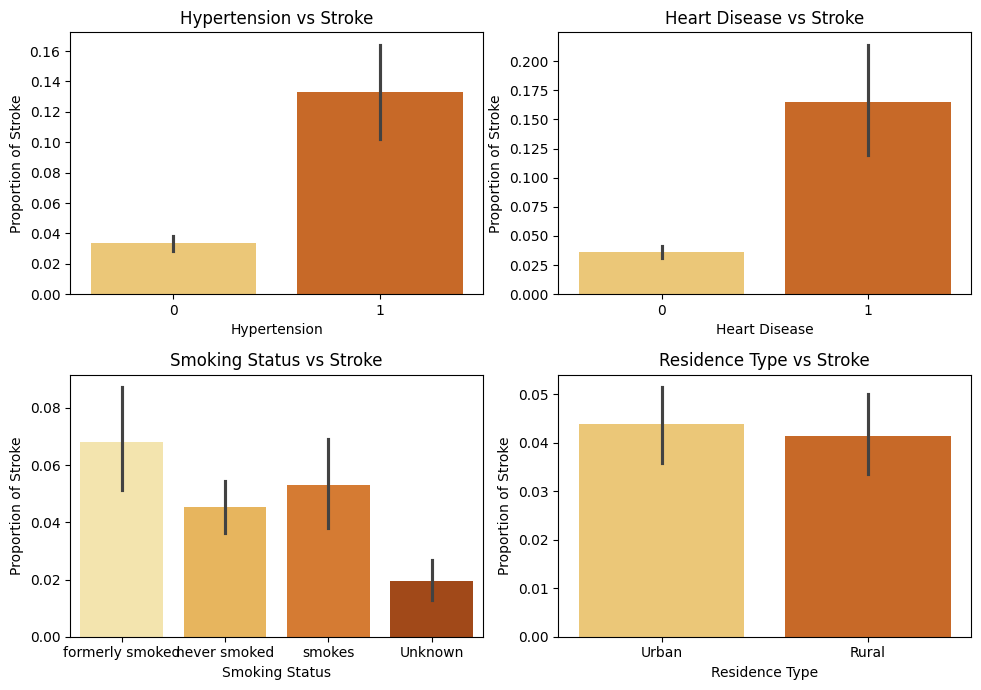

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plots for categorical variables
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
sns.barplot(x='hypertension', y='stroke', hue='hypertension', data=stroke_data, palette="YlOrBr", dodge=False)
plt.title('Hypertension vs Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Proportion of Stroke')
plt.legend([],[], frameon=False)

plt.subplot(2, 2, 2)
sns.barplot(x='heart_disease', y='stroke', hue='heart_disease', data=stroke_data, palette="YlOrBr", dodge=False)
plt.title('Heart Disease vs Stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Proportion of Stroke')
plt.legend([],[], frameon=False)

plt.subplot(2, 2, 3)
sns.barplot(x='smoking_status', y='stroke', hue='smoking_status', data=stroke_data, palette="YlOrBr", dodge=False)
plt.title('Smoking Status vs Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion of Stroke')
plt.legend([],[], frameon=False)

plt.subplot(2, 2, 4)
sns.barplot(x='Residence_type', y='stroke', hue='Residence_type', data=stroke_data, palette="YlOrBr", dodge=False)
plt.title('Residence Type vs Stroke')
plt.xlabel('Residence Type')
plt.ylabel('Proportion of Stroke')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

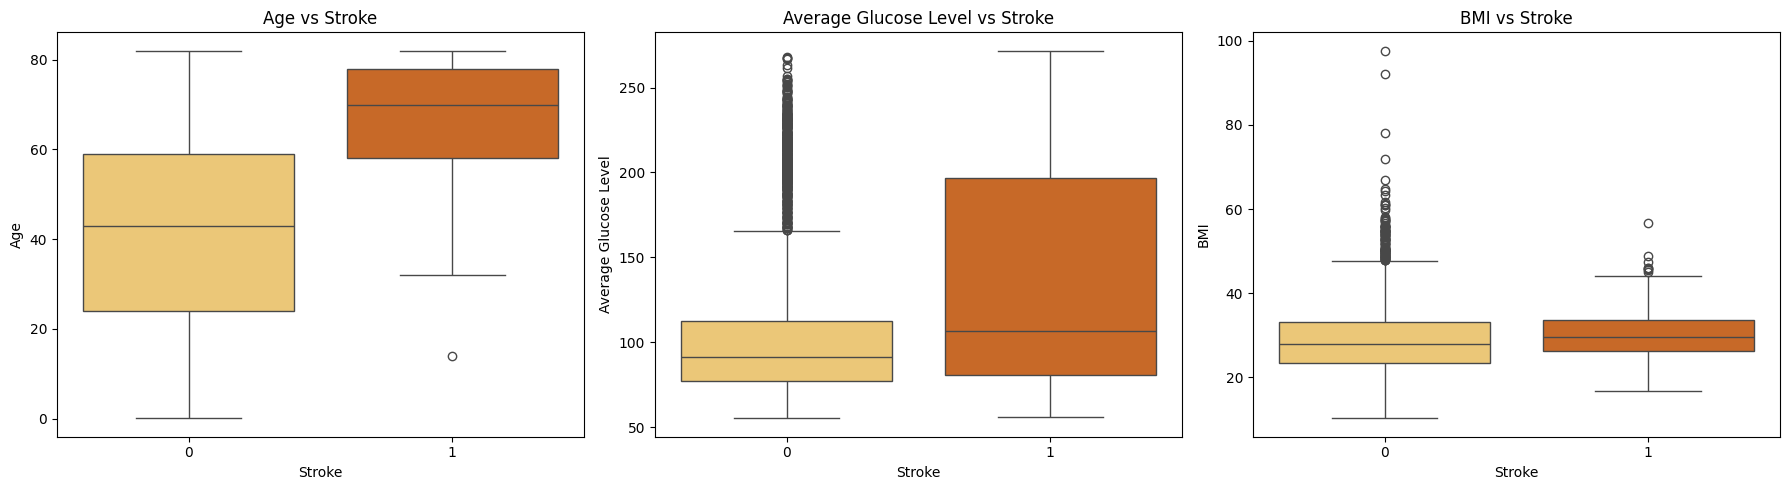

In [9]:
# Box plots for numerical variables
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='stroke', y='age', hue='stroke', data=stroke_data, palette="YlOrBr", dodge=False)
plt.title('Age vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.legend([],[], frameon=False)

plt.subplot(1, 3, 2)
sns.boxplot(x='stroke', y='avg_glucose_level', hue='stroke', data=stroke_data, palette="YlOrBr", dodge=False)
plt.title('Average Glucose Level vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.legend([],[], frameon=False)

plt.subplot(1, 3, 3)
sns.boxplot(x='stroke', y='bmi', hue='stroke', data=stroke_data, palette="YlOrBr", dodge=False)
plt.title('BMI vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


##**Insights**
*   **Hypertension and heart disease** are strong risk factors for stroke, with patients having these conditions showing a higher likelihood of stroke incidents
*   **Smoking status** also influences stroke risk, with 'formerly smoked' individuals having the highest proportion of stroke incidents.
*   **Residence type** shows a marginal difference in stroke proportion, with a slight increase in urban areas.
*   **Age** is a significant risk factor, with older individuals being more susceptible to strokes.
*   **Average glucose** levels are higher in stroke patients, highlighting the potential impact of blood sugar management on stroke risk.
*   **BMI** shows a minor difference, suggesting it might not be as strong a predictor as age or glucose levels but still relevant.







# **Feature Engineering**

**Age Groups**: The continuous age variable was converted into categorical age groups (e.g., 0-18, 19-35, 36-50, 51-65, 66+). This helps the model better capture the non-linear relationship between age and stroke risk.

In [10]:
stroke_data['age_group'] = pd.cut(stroke_data['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])
stroke_data = stroke_data.drop(['age'], axis=1)

**BMI Categories**: BMI values were categorized into standard BMI categories (e.g., underweight, normal weight, overweight, obese). This helps in identifying different risk levels associated with various BMI ranges.

In [11]:
stroke_data['bmi_category'] = pd.cut(stroke_data['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])
stroke_data = stroke_data.drop(['bmi'], axis=1)

**Average Glucose Level Ranges**: Average glucose levels were categorized into ranges (e.g., normal, prediabetic, diabetic). This helps in understanding how glucose levels impact stroke risk.

In [12]:
stroke_data['glucose_level_category'] = pd.cut(stroke_data['avg_glucose_level'], bins=[0, 99, 125, 500], labels=['Normal', 'Prediabetic', 'Diabetic'])
stroke_data = stroke_data.drop(['avg_glucose_level'], axis=1)

**Smoking Status Simplification**: The smoking status was simplified into binary categories (e.g., smoker, non-smoker) to reduce model complexity while retaining essential information.

In [13]:
stroke_data['smoking_status_simplified'] = stroke_data['smoking_status'].apply(lambda x: 'Non-smoker' if x == 'never smoked' else 'Smoker')
stroke_data = stroke_data.drop(['smoking_status'], axis=1)

**Balancing The Data**

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Assuming stroke_data is your DataFrame
# Separate features and target variable
X = stroke_data.drop(columns=['id', 'stroke'])
y = stroke_data['stroke']

# Apply label encoding to categorical columns and store mappings
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status_simplified', 'glucose_level_category', 'age_group', 'bmi_category']
label_encoders = {}
encoding_mappings = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])
    encoding_mappings[col] = {category: label for label, category in enumerate(label_encoders[col].classes_)}

# Display the current class distribution
print("Original class distribution:")
print(y.value_counts())

# Step 1: Undersample the majority class to 1000 samples
undersampler = RandomUnderSampler(sampling_strategy={0: 1000, 1: y.value_counts()[1]}, random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Step 2: Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy={0: 1000, 1: 1000}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_undersampled, y_undersampled)

encoding_mappings = {
    'gender': {'Female': 0, 'Male': 1, 'Other': 2},
    'ever_married': {'No': 0, 'Yes': 1},
    'work_type': {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4},
    'Residence_type': {'Rural': 0, 'Urban': 1},
    'smoking_status': {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3},
    'smoking_status_simplified': {'Non-smoker': 0, 'Smoker': 1},
    'glucose_level_category': {'Diabetic': 0, 'Normal': 1, 'Prediabetic': 2},
    'age_group': {'0-18': 0, '19-35': 1, '36-50': 2, '51-65': 3, '66+': 4},
    'bmi_category': {'Normal weight': 0, 'Obese': 1, 'Overweight': 2, 'Underweight': 3}
}

# Reverse the label encoding
for col in categorical_columns:
    if col in encoding_mappings:
        X_resampled[col] = X_resampled[col].map({v: k for k, v in encoding_mappings[col].items()})

# Combine resampled data with the target variable
resampled_data = pd.concat([X_resampled, y_resampled.reset_index(drop=True)], axis=1)

# Display the new class distribution
print("Resampled class distribution:")
print(y_resampled.value_counts())

stroke_data = resampled_data.copy()

Original class distribution:
stroke
0    4700
1     209
Name: count, dtype: int64
Resampled class distribution:
stroke
0    1000
1    1000
Name: count, dtype: int64


# **Model Selection**

**Model Selection and Training:**

* Two models were chosen for comparison: Random Forest and Gradient Boosting.
* Both models were trained on a balanced dataset, split into training and testing sets, ensuring that the models generalize well to unseen data.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
stroke_data_encoded = pd.get_dummies(stroke_data, drop_first=True)
# Define features and target
X = stroke_data_encoded.drop(['stroke'], axis=1)
y = stroke_data_encoded['stroke']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                   Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest      0.833333   0.805556  0.875839  0.839228  0.919702
Gradient Boosting  0.801667   0.772036  0.852349  0.810207  0.873989


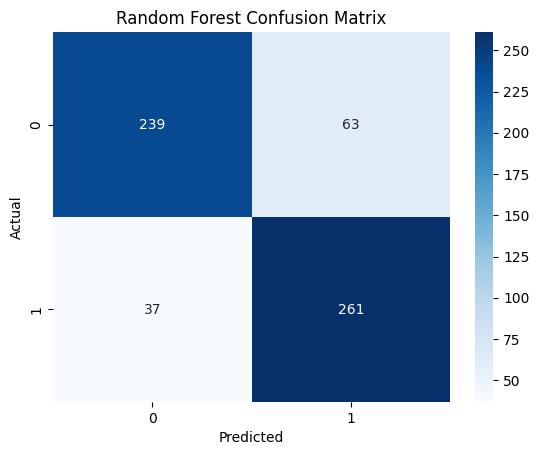

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       302
           1       0.81      0.88      0.84       298

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600



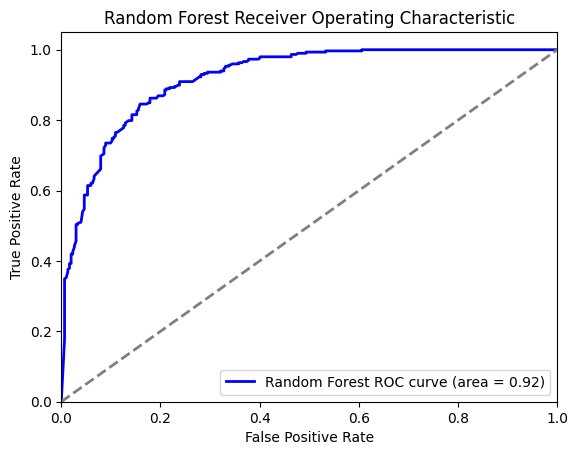

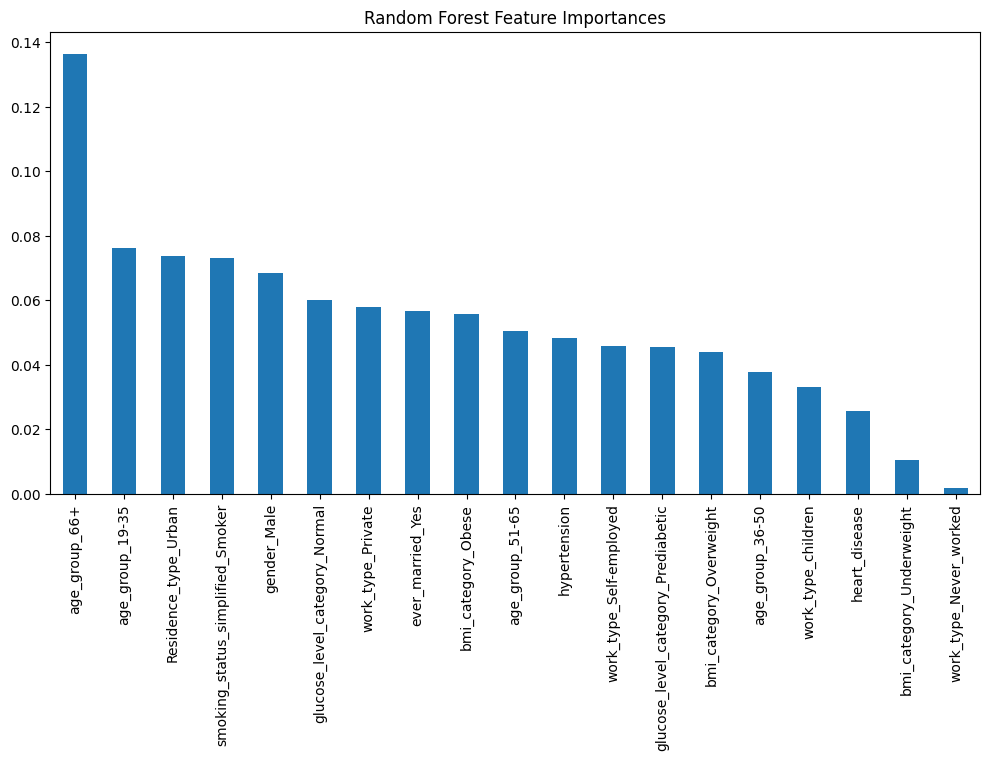

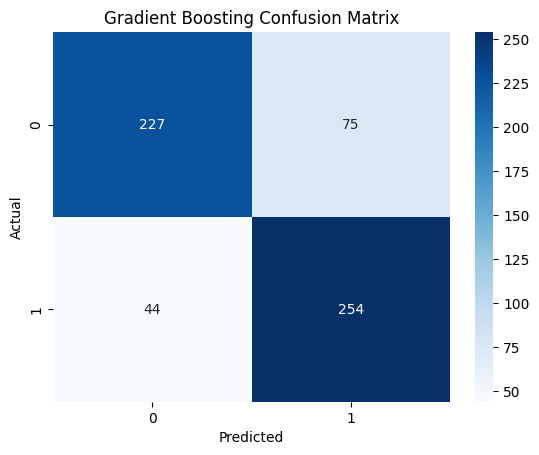

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       302
           1       0.77      0.85      0.81       298

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.81      0.80      0.80       600



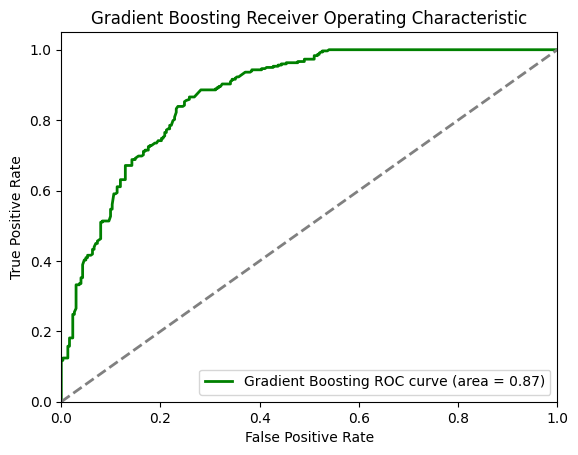

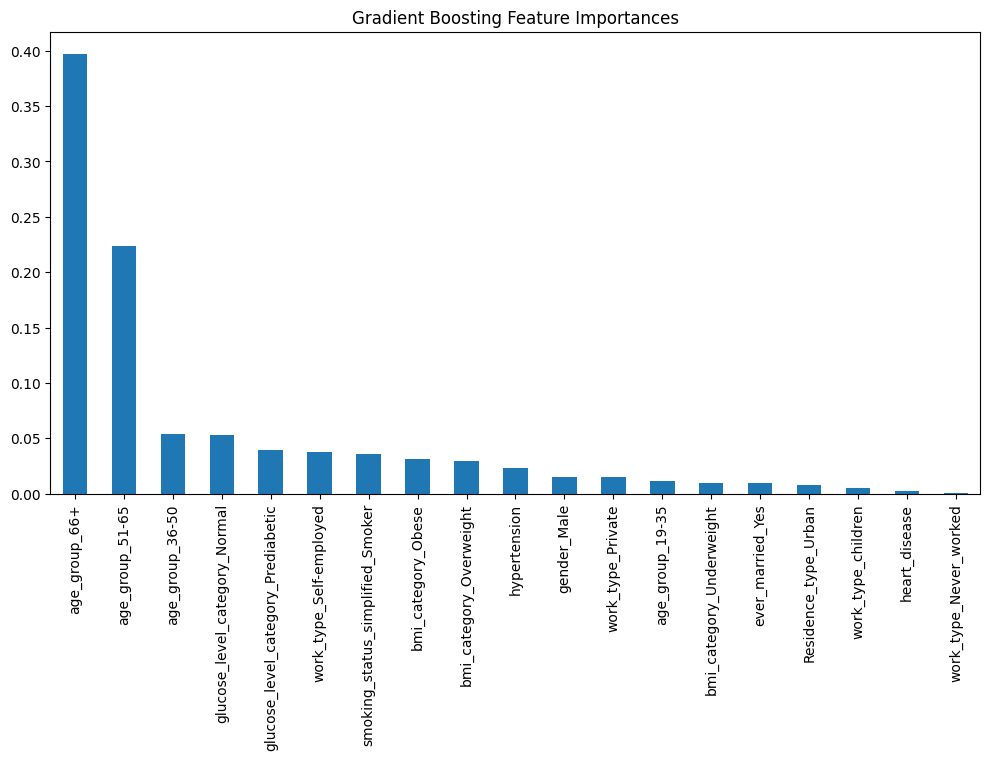

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Random Forest
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Random Forest
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Feature Importance for Random Forest
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances_rf.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Random Forest Feature Importances')
plt.show()

# Evaluate Gradient Boosting
gb_model = models['Gradient Boosting']
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Gradient Boosting
print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gb, zero_division=0))

# ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Feature Importance for Gradient Boosting
feature_importances_gb = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importances_gb.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Gradient Boosting Feature Importances')
plt.show()


# **Model Training**

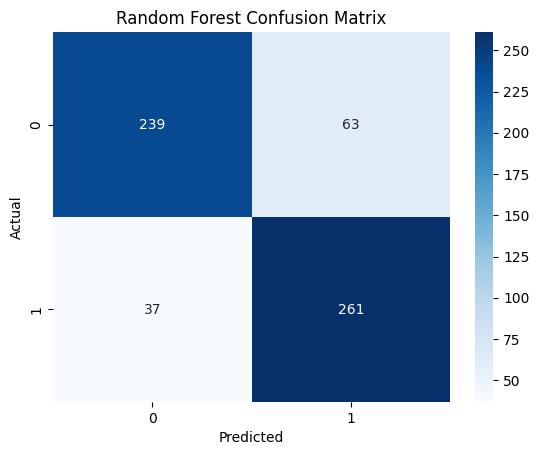

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       302
           1       0.81      0.88      0.84       298

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600



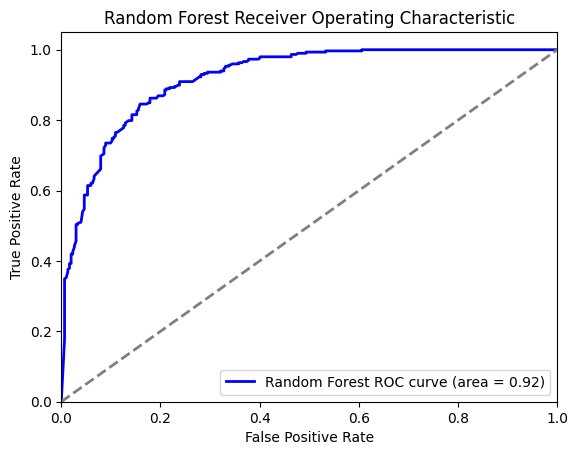

In [18]:
# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Random Forest
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# **Conclusion**

**Further Steps and Improvements**

* Feature Engineering: Further feature engineering could enhance the model's predictive power. This includes creating interaction terms, polynomial features, and aggregating features based on domain knowledge.

* Model Optimization: Hyperparameter tuning using techniques like Grid Search or Random Search could optimize the model's performance.
Exploring other machine learning algorithms such as Gradient Boosting, XGBoost, or neural networks could potentially yield better results.

* Handling Class Imbalance: Implementing advanced techniques to handle class imbalance, such as Synthetic Minority Over-sampling Technique (SMOTE) or using ensemble methods like Balanced Random Forest, could improve the model's recall for the minority class.

* Incorporating External Data: Including additional data sources, such as socio-economic factors, healthcare accessibility, and environmental variables, could provide a more comprehensive understanding of stroke risk factors.

* Model Deployment and Monitoring: Developing a real-time predictive system and integrating it with healthcare services could assist in early detection and intervention.
Continuous monitoring and updating the model with new data will ensure its relevance and accuracy over time.

* Ethical Considerations and Bias Mitigation: Ensuring the model is unbiased and fair across different demographic groups is crucial. Regular audits and fairness checks should be conducted to identify and mitigate any potential biases.

By addressing these areas, the predictive model can be further refined and made more robust, contributing significantly to stroke prevention and healthcare improvement.